![](http://www.tshs.tp.edu.tw/images/bg/logo.jpg) 

## 多元選修課程：Python與人工智慧程式設計

# 【第九週】Python資料分析與資料視覺化

![](https://drive.google.com/uc?export=view&id=1wjRnjbK7XneINl5qaTR1W1cxEB0xWNYS)

## 資料分析(Data Anaysis)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/300px-Pandas_logo.svg.png)

**pandas** 是Python受歡迎的資料分析與操作套件，有人也會戲稱它為「熊貓」、或是Python界的<u>Excel</u>。pandas 主要是用來操作和處理表格式的資料(tabular data)。所謂表格式的資料，基本上是一個二維的資料結構，具有行(column)與列(row)。

> 台灣常用的用語剛好跟中國大陸相反，為省麻煩乾脆都講英文就不會錯
>
>||直(英文:column)|橫(英文:row)|
>|---|---|---|
>|台灣用語|行|列|
>|中國大陸用語|列|行|

同學們應該可以觀察到，上面這個比較表其實就是一個表格式資料。我們再看一個典型的例子：考試成績表，它的column代表的是每一個人某一科目的成績，row代表的是某一個人的所有科目成績。

|索引|座號|國文|英文|數學|
|---|---|---|---|---|
|0|座號1|63|70|100|
|1|座號2|70|70|70|
|2|座號3|91|100|56|
|3|座號4|70|70|56|
|4|座號5|91|84|98|

Colab 已經預先安裝 pandas，所以只要執行 import 就可以開始使用。

In [47]:
import pandas as pd

pandas 主要有兩種資料型態：Series和DataFrame。簡單來說，Series是一維的資料，通常用來當做column的資料，而DataFrame是二維的資料，也就是整個表格。

### 【任務9-1】用 `Series` 和 `DataFrame` 來建立考試成績表資料

用Series來建立一維的資料，語法如下：

```python
pandas.Series(data="要建立的資料", name="column名稱")
```

其中要建立的資料，可以使用**串列、字典、NumPy陣列**等。在下面的例子中我們示範用串列來建立Series，以上面的考試成績表為例，一步一步建立表格式資料。

In [48]:
# 以串列來儲存座號資料
a = ["座號1", "座號2", "座號3", "座號4", "座號5"]

# 用座號串列來建立Series資料
s1 = pd.Series(a, name="座號")

In [49]:
s1   # 印出我們建立的Series

0    座號1
1    座號2
2    座號3
3    座號4
4    座號5
Name: 座號, dtype: object

In [50]:
# 仿照座號資料，建立國文、英文、數學的資料
s2 = pd.Series([63, 70, 91, 70, 91], name='國文')
s3 = pd.Series([70, 70, 100, 70, 84], name='英文')
s4 = pd.Series([100, 70, 56, 56, 98], name='數學')

要建立完整的考試成績表表格式資料，可以呼叫 `pd.concat()` 將上面建好的Series資料連接起來。`axis=1`的用意是，我們指定要將每一個Series當做是column。

語法如下：

```python
pandas.concat([Series1, Series2, ...], axis=0)   # 預設連接的軸是軸0
```

In [75]:
df = pd.concat([s1, s2, s3, s4], axis=1)
df

,座號,國文,英文,數學
0,座號1,63,70,100
1,座號2,70,70,70
2,座號3,91,100,56
3,座號4,70,70,56
4,座號5,91,84,98


`pandas.concat()` 回傳的資料，其型態就是 DataFrame。

In [52]:
type(df)

pandas.core.frame.DataFrame

### 【試一試】建立考試成績表時，如果將連接時的軸設為軸0的話，產生的資料會變成什麼樣子？

In [53]:
# 請在下一行開始輸入你的程式碼
df1 = pd.concat([s1, s2, s3, s4], axis=0)
df1

0    座號1
1    座號2
2    座號3
3    座號4
4    座號5
0     63
1     70
2     91
3     70
4     91
0     70
1     70
2    100
3     70
4     84
0    100
1     70
2     56
3     56
4     98
dtype: object

### 【任務9-2】怎麼樣取得座號3同學的英文成績？

|索引|座號|國文|英文|數學|
|---|---|---|---|---|
|0|座號1|63|70|100|
|1|座號2|70|70|70|
|2|座號3|91|100|56|
|3|座號4|70|70|56|
|4|座號5|91|84|98|

要取得特定資料值的類似函式有幾種不同的方式，比較如下：

|函式|說明|範例|
|---|---|---|
|DataFrame.loc()|用名稱來定位資料|df.loc["row名稱"]["column名稱"]|
|DataFrame.iloc()|用索引來定位資料|df.iloc["row索引"]["column索引"]|
|DataFrame.at()|用名稱來定位單一筆資料|df.at["row名稱", "column名稱"]|

In [54]:
# 用名稱來定位單一筆資料
df.at[2, "英文"]

100

In [55]:
# 用名稱來定位資料
df.loc[2]["英文"]

100

In [56]:
# 用索引來定位資料
df.iloc[2][2]

100

對於 `loc` 和 `iloc` 來說，指定的定位索引或是名稱可以是多個，方式是用串列或是範圍。

例如：要取得前3個座號的國文、英文、數學成績，我們分別在指定要取得的row時使用串列來定義；而指定要取得的column時用起漿和結尾column來指明， `loc` 就會將"國文"～"數學"之間的column都找出來(包含"英文")。

In [74]:
df.loc[[0, 1, 2], "英文":"數學"]

,英文,數學
0,70,100
1,70,70
2,100,56


### 【任務9-3】找出每一科最高分、最低分，以及平均分數

呼叫 `pandas.describe()` 函式，可以將各個column的統計資料彙整顯示(正式的名稱叫做**「敍述統計Descriptive Statistics」**)。

下表是輸出的結果，可以看到裡面有幾個統計資料：
- count: 資料筆數
- mean: 平均數
- std: 標準差；標準差大，代表資料與平均數之間的差異較大，反之則差異較小。
- min: 最小值
- max: 最大值
- 25%, 50%, 75%: 百分位數；代表有多少百分比的分數在這個百分比以下。

In [58]:
df.describe()

,國文,英文,數學
count,5.000000,5.000000,5.000000
mean,77.000000,78.800000,76.000000
std,13.095801,13.311649,21.771541
min,63.000000,70.000000,56.000000
25%,70.000000,70.000000,56.000000
50%,70.000000,70.000000,70.000000
75%,91.000000,84.000000,98.000000
max,91.000000,100.000000,100.000000


除了 `pandas.describe()` 函式之外，使用 `DataFrame.max()` 與 `DataFrame.min()` 函式也可以取得最大值和最小值。

In [59]:
df.max(axis=0)

座號    座號5
國文     91
英文    100
數學    100
dtype: object

In [60]:
df.min(axis=0)

座號    座號1
國文     63
英文     70
數學     56
dtype: object

如果只要計算英文科目的平均分數的話，可以加上名稱。

In [61]:
df["英文"].mean(axis=0)

78.8

### 【任務9-4】讀取資料來進行分析 - CSV格式的檔案

**CSV** 的全名是 Comma-Separated Values，原義是不同的資料點(值)之間用英文逗號 `,` 分隔，CSV檔案則是用文字檔案的格式儲存。

但是廣義來說，常用來分隔資料點的符號有很多種，所以現在不一定是用英文逗號來分隔，開啟的時候可以告訴 pandas 是用哪一種符號。

> CSV檔案可以簡化視為簡單版的Excel檔案；CSV檔案載入後會形成表格式的資料。

pandas 提供用來開啟 CSV 檔案的函式為 `pandas.read_csv()`，回傳的資料型別為 `DataFrame`。語法及常用的引數說明：

```python
pandas.read_csv(filepath, sep=',', header='infer')
```

- filepath_or_buffer：檔案路徑及名稱
- sep：分隔符號
- header：是否有欄位名稱。通常欄位名稱在第一個row，但也可以指定哪一個row是欄位名稱；如果沒有的話，就設為 None。

例如：要讀取一個名為 `insurance.csv` 的 CSV 檔案，語法如下。

In [62]:
insurance = pd.read_csv("insurance.csv")
type(insurance)

pandas.core.frame.DataFrame

In [63]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## 資料視覺化(Data Visualization)

有一句英文諺語 "A picture is worth a thousand word"，也有研究指出 90% 的資訊是透過圖像進入到大腦中，在在都說明視筧化對於資料呈現的重要性。

**資料視覺化**是統計學中重要的內容，透過圖表可以將資料更生動地呈現出來。Python環境中資料視覺化的套件很多，尤其以 matplotlib 最受歡迎，與其他套件的整合性也最好。

![](https://matplotlib.org/_static/logo2_compressed.svg)

colab 已經預先安裝 matplotlib，所以只要輸入 import 就可以使用。

In [64]:
import matplotlib.pyplot as plt

### 【任務9-5】擲骰子每個數字出現的次數是不是約略相同，畫張圖表來顯示 - 柱狀圖(Bar Chart)

In [65]:
import random

random.seed(3)

a = []

for i in range(10000):
    a.append(random.randint(1, 6))

In [66]:
for j in range(1, 7):
    print(j, "出現的次數：", a.count(j))

1 出現的次數： 1658
2 出現的次數： 1653
3 出現的次數： 1769
4 出現的次數： 1695
5 出現的次數： 1645
6 出現的次數： 1580


用 collections 模組的功能，將串列中所有骰子出現的次數統計，並且存為字典格式。

In [67]:
from collections import Counter

counts = Counter(a)
counts

Counter({1: 1658, 2: 1653, 3: 1769, 4: 1695, 5: 1645, 6: 1580})

有了次數統計字典資料，我們就可以將擲骰子的各個次數，用柱狀圖(bar chart)畫出來。由於每個點數出現的機率應該是相同的，繪製柱狀圖可以看出，每個點數出現的次數約略相同。

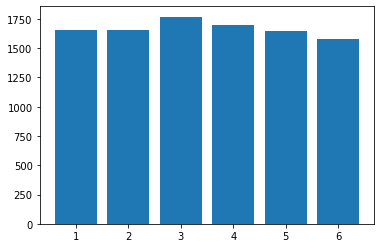

In [68]:
plt.bar(x=counts.keys(), height=counts.values())
plt.show()

### 【任務9-6】用散點圖(Scatter Plot)來看資料的分布

散點圖常用來觀察資料的分布，也可以從分布的情況約略看出資料是否是不是歸屬其類別。要繪製散點圖時須告訴它資料點的x軸與y軸的值是多少，才能繪製出正確的點。

下面的範例是讀取保險資料，藉此來觀察不同條件的人(年齡、性別、BMI值、子女數、是否抽菸、居住區域)其繳納保險費(charges)的高低。

In [69]:
insurance = pd.read_csv("insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


通常我們的認知是BMI的高低與健康情況相關，而健康與否關係到投保時的保險費。

首先我們先繪出BMI與保險費的分布。從圖中約略可以看出，似乎BMI愈高(不健康)的人保險費有較高的現象。

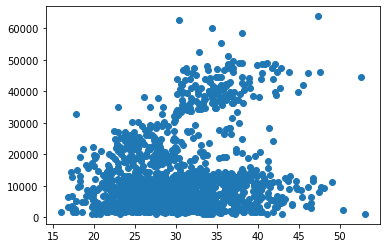

In [70]:
plt.scatter(x=insurance["bmi"], y=insurance["charges"])
plt.show()

### 【想一想】BMI相同的人保險費也有高有低，這是什麼原因呢？

不過，從上面的圖我們也發現，BMI相同的人保險費也有高有低，這是什麼原因呢？

我們嘗試將有沒有抽菸這個資料加到圖中。由於抽菸可能導致健康問題，而健康又會影響保險費。我們將有沒有抽菸用不同的顏色區分，這時候會發現同樣BMI的人，有抽菸的人保險費明顯較高。

![](https://seaborn.pydata.org/_static/logo-wide-lightbg.svg)

下圖我們使用的是 seaborn 套件，可以把它視為是 matplotlib 的外掛，讓我們在繪製圖表時更簡單但有更強大的功能。

colab 已經預先安裝 seaborn，所以只要輸入 import 就可以使用。

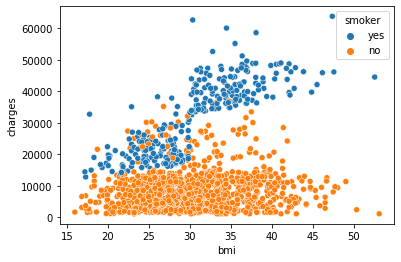

In [71]:
import seaborn as sns

sns.scatterplot(x=insurance["bmi"], y=insurance["charges"], hue=insurance["smoker"])
plt.show()

### 【挑戰】用花瓣的長度或寬度來區分花的種類 - 鳶尾花資料集

鳶尾花資料集（英文：Iris flower data set）最初是20世紀初由生物學家埃德加·安德森從加拿大加斯帕半島上的鳶尾屬花朵中提取的數據，後由統計學家羅納德·費雪運用到統計學中。在學習機器學習時也是常被人們用來練習的資料集。

在鳶尾花資料集有4個column，分別記錄不同品種鳶尾花的花萼(sepal)和花瓣(petal)的長度和寬度。

資料集包含了150個樣本，都屬於鳶尾屬下的三個亞屬，分別是山鳶尾(Iris Setosa)、變色鳶尾(Iris Versicolour)和維吉尼亞鳶尾(Iris Virginica)。四個特徵分別是花萼和花瓣的長度和寬度(單位為公分)。

[資料來源：維基百科]

#### <font color="red">問題：</font>

在這個挑戰中，請載入 Iris dataset，依照花瓣(petal)的長度和寬度繪製出散點圖，並以顏色標示不同品種的點，藉此來觀察花瓣長度和寬度是否能約略區分出花的鳶尾花的品種。

#### 步驟1

將資料集檔案 `iris.data` 上傳至colab，並使用 pandas 的 `read_csv()` 函式將檔案讀入建立DataFrame。

特別要注意的是這個資料集檔案中並沒有欄位名稱。

In [72]:
import pandas as pd

# 請從下一行開始撰寫程式
iris=

In [ ]:
# 執行此區塊，確認輸出的形狀是否為150筆資料、5個column
# 若不是的話，表示讀取檔案不正確
iris.shape

#### 步驟2

填空題，請將須傳入的x軸、y軸、及顏色編碼依據的品種，做為呼叫 `scatterplot()` 的引數傳入。

In [ ]:
# 將品種的值取出，將做為顯示顏色的依據
species = iris[4].values

# 請從完成下一行程式，傳入3個引數需要的值
sns.scatterplot(x=, y=, hue=)

# 設定x軸與y軸的顯示名稱
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

### 【回憶】用折線圖看出數字的變化

如果我們想要用中央氣象局的統計數字，畫一張折線圖來看看每個月平均氣溫的變化。

首先我們可以從中央氣象局的網頁查到2020年台北市每個月的平均氣溫。

|一月|二月|三月|四月|五月|六月|七月|八月|九月|
|---|---|---|---|---|---|---|---|---|
|17.9|18.7|20.8|20.9|26.9|30.5|30.9|30.2|27.8|

資料來源：

- 中央氣象局**每月氣象**網頁 [https://www.cwb.gov.tw/V8/C/C/Statistics/monthlydata.html](https://www.cwb.gov.tw/V8/C/C/Statistics/monthlydata.html)

- 中央氣象局**氣候月平均**網頁 [https://www.cwb.gov.tw/V8/C/C/Statistics/monthlymean.html](https://www.cwb.gov.tw/V8/C/C/Statistics/monthlymean.html)

下面的範例中，用兩個串列來存放月份及各月平均氣溫。使用 `plot()` 函式來畫出折線圖。

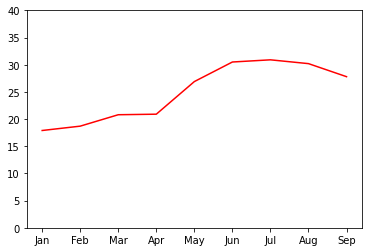

In [78]:
x = ['Jan', 'Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep']
y = [17.9, 18.7, 20.8, 20.9, 26.9, 30.5, 30.9, 30.2, 27.8]

plt.ylim(0, 40)   # 設定y軸的最大值和最小值
plt.plot(x, y, color='red')   # 傳入資料，並設定折線的顏色
plt.show()   # 顯示圖表

### 【任務9-7】台北2020年比2019年熱嗎？

將資料集檔案 taipei_temp_history.csv 上傳至colab，並使用 pandas 的 read_csv() 函式將檔案讀入建立DataFrame。

在這個檔案中，包含了2020、2019年台北市每月平均氣溫，以及1981-2010之間的台北市每月平均氣溫，年份分別標示為2020、2019、historical。

In [79]:
# 載入資料檔
df = pd.read_csv("taipei_temp_history.csv")
df

,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2020,17.9,18.7,20.8,20.9,26.9,30.5,30.9,30.2,27.8,NaN,NaN,NaN
1,2019,18.5,18.8,19.8,24.2,25.0,28.5,30.3,30.5,27.3,25.3,22.0,19.1
2,historical,16.1,16.5,18.5,21.9,25.2,27.7,29.6,29.2,27.4,24.5,21.5,17.9


由於年份並非氣溫資料，所以我們將其設定為索引標籤，使用 `DataFrame.set_index()` 函式。

In [80]:
df = df.set_index("year")

In [81]:
df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
2020,17.9,18.7,20.8,20.9,26.9,30.5,30.9,30.2,27.8,NaN,NaN,NaN
2019,18.5,18.8,19.8,24.2,25.0,28.5,30.3,30.5,27.3,25.3,22.0,19.1
historical,16.1,16.5,18.5,21.9,25.2,27.7,29.6,29.2,27.4,24.5,21.5,17.9


查看2019的每月平均氣溫資料。由於2019年的資料row的索引是1(也就是第二橫列)，所以我們用 `iloc[1]` 來取得。

In [82]:
df.iloc[1]

Jan    18.5
Feb    18.8
Mar    19.8
Apr    24.2
May    25.0
Jun    28.5
Jul    30.3
Aug    30.5
Sep    27.3
Oct    25.3
Nov    22.0
Dec    19.1
Name: 2019, dtype: float64

折線圖的資料接受 pandas Series 做為資料來源，分別將2020和2019的資料傳入。

要畫出多條折線，可以執行多個 `plt.plot()` 分別畫出不同的線條，並且用顏色區分。

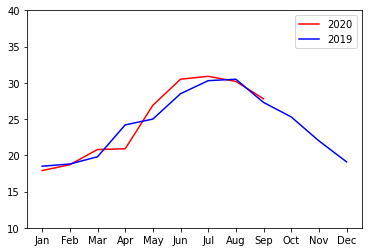

In [83]:
plt.ylim(10, 40)
plt.plot(df.iloc[0], color='red')
plt.plot(df.iloc[1], color='blue')
plt.legend([2020, 2019])
plt.show()

看到圖形後，你覺得台北2020年比2019年熱嗎？

### 【挑戰】夏天北極38度了，今年到底有多熱？

據統計資料指出，2020年是有史以來最熱的一年，不知道在夏天時你是否感受熱到受不了，中午時動不動就是38度的體感溫度，未來恐怕全球暖化將會加劇極端氣候持續發生。

#### <font color="red">問題：</font>

台灣氣溫變化的情況又是如何呢？我們從中央氣象局提供的每月平均氣溫是否能夠發現2020年平均氣溫是否比往年高？我們可以運用Python及matplotlib畫張比較圖表來觀察。

參考資料：[2020恐是有史以來最熱的一年！氣候科學家警告：環保行動做再多都阻止不了全球暖化](https://www.storm.mg/lifestyle/2889296)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 請從下一行開始撰寫程式，讀取 CSV 檔案


In [ ]:
plt.ylim(10, 40)
plt.plot(df.iloc[0][:], color='red')

In [ ]:
# 請在此處傳入歷史資料，並繪製成綠色線條以供識別


In [ ]:
# 請在此處將圖例設為2020及Historial


In [ ]:
plt.show()

看到圖形後，你覺得台北2020年可能是史上最熱嗎？